<a href="https://colab.research.google.com/github/mapaloCat/Traffic-Sign-Detection-System/blob/master/02a_train_classification_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The German Traffic Sign Benchmark - Data Preparation

Collaborator 1: Panagiotis Michalopoulos

Collaborator 2: Filip Finfando

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!wget -c https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip FullIJCNN2013.zip

--2020-02-21 21:52:58--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1661866983 (1.5G) [application/zip]
Saving to: ‘FullIJCNN2013.zip’

FullIJCNN2013.zip   100%[===================>]   1.55G   118MB/s    in 14s     

2020-02-21 21:53:13 (115 MB/s) - ‘FullIJCNN2013.zip’ saved [1661866983/1661866983]

Archive:  FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN2013/00009.p

In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (96, 96)

# Function for reading the images
def readImages(rootpath, images_range, signs_range, datapath, scaled):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(datapath, delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        if scaled:
          scale = 1
        else:
          scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [4]:
# use those numbers to change range in the next cell
! wc -l 'drive/My Drive/data/bin_labels_sorted.txt'
! grep "00600.ppm" -B 5 -A 5 -m 1 'drive/My Drive/data/bin_labels_sorted.txt' --line-number

20554 drive/My Drive/data/bin_labels_sorted.txt
13566-00599.ppm;823;393;861;416;-1
13567-00599.ppm;827;392;848;413;-1
13568-00599.ppm;879;342;935;393;-1
13569-00599.ppm;922;336;954;359;-1
13570-00599.ppm;961;328;1011;391;-1
13571:00600.ppm;105;425;139;453;-1
13572-00600.ppm;116;435;154;472;-1
13573-00600.ppm;12;426;71;496;-1
13574-00600.ppm;124;422;148;456;-1
13575-00600.ppm;1;423;97;512;-1
13576-00600.ppm;151;459;183;479;-1


In [0]:
number_of_samples = 20554 
split_at = 13570

In [0]:
# This dataset includes the proposals with IOU>=0.5 alongside the ground truth images
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,split_at), 'drive/My Drive/data/bin_labels_sorted.txt', True)
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(split_at,number_of_samples), 'drive/My Drive/data/bin_labels_sorted.txt', True)

In [7]:
import collections

index = [i for i,x in enumerate(train_labels) if x != '-1']
train_files = np.array(train_files)
train_files = train_files[np.array(index).astype('int')]
train_signs = np.array(train_signs)
train_signs = train_signs[np.array(index).astype('int')]
train_bboxes = np.array(train_bboxes)
train_bboxes = train_bboxes[np.array(index).astype('int')]
train_labels = np.array(train_labels)
train_labels = train_labels[np.array(index).astype('int')]

print(collections.Counter(train_labels))

index = [i for i,x in enumerate(test_labels) if x != '-1']
test_files = np.array(test_files)
test_files = test_files[np.array(index).astype('int')]
test_signs = np.array(test_signs)
test_signs = test_signs[np.array(index).astype('int')]
test_bboxes = np.array(test_bboxes)
test_bboxes = test_bboxes[np.array(index).astype('int')]
test_labels = np.array(test_labels)
test_labels = test_labels[np.array(index).astype('int')]

print(collections.Counter(test_labels))

Counter({'10': 139, '2': 134, '38': 113, '12': 113, '13': 111, '8': 101, '1': 99, '7': 94, '5': 89, '9': 73, '4': 68, '11': 58, '18': 50, '14': 50, '17': 49, '3': 48, '25': 47, '6': 44, '30': 33, '23': 30, '35': 30, '33': 27, '26': 24, '15': 22, '22': 21, '20': 19, '28': 18, '34': 18, '16': 18, '40': 14, '36': 13, '41': 12, '42': 12, '0': 10, '39': 8, '21': 8, '27': 8, '29': 8, '19': 6, '32': 6, '37': 2, '24': 2, '31': 2})
Counter({'4': 84, '1': 78, '13': 74, '12': 69, '38': 64, '2': 50, '10': 34, '5': 34, '11': 27, '8': 25, '14': 25, '3': 23, '18': 22, '9': 21, '23': 19, '25': 18, '26': 14, '7': 13, '28': 13, '32': 12, '15': 11, '17': 10, '35': 10, '42': 9, '22': 8, '24': 7, '34': 7, '40': 6, '33': 6, '6': 5, '30': 4, '29': 4, '39': 3, '37': 3, '31': 3, '16': 2, '41': 2, '36': 2})


In [0]:
# # Train only by using the ground truth images
# # The German Traffic Sign Recognition Benchmark
# train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852), 'FullIJCNN2013/gt.txt', False)
# test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213), 'FullIJCNN2013/gt.txt', False)

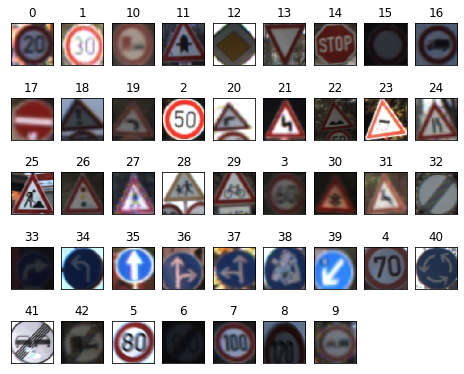

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)

## Data Augmentation - Balance Dataset

In [0]:
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform

def rotate_image(image, max_angle =15):
    rotate_out = rotate(image, np.random.uniform(-max_angle, max_angle), mode='edge')
    return rotate_out

def translate_image(image, max_trans = 5, height=96, width=96):
    translate_x = max_trans*np.random.uniform() - max_trans/2
    translate_y = max_trans*np.random.uniform() - max_trans/2
    translation_mat = np.float32([[1,0,translate_x],[0,1,translate_y]])
    trans = cv2.warpAffine(image, translation_mat, (height,width))
    return trans
    
def projection_transform(image, max_warp=0.8, height=96, width=96):
    #Warp Location
    d = height * 0.3 * np.random.uniform(0,max_warp)
    
    #Warp co-ordinates
    tl_top = np.random.uniform(-d, d)     # Top left corner, top margin
    tl_left = np.random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-d, d)     # Top right corner, top margin
    tr_right = np.random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = np.random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-d, d)   # Bottom right corner, right margin
        
    ##Apply Projection
    transform = ProjectiveTransform()
    transform.estimate(np.array((
                (tl_left, tl_top),
                (bl_left, height - bl_bottom),
                (height - br_right, height - br_bottom),
                (height - tr_right, tr_top)
            )), np.array((
                (0, 0),
                (0, height),
                (height, height),
                (height, 0)
            )))
    output_image = warp(image, transform, output_shape=(height, width), order = 1, mode = 'edge')
    return output_image
    

def transform_image(image, max_angle=15, max_trans =5 ,max_warp=0.8):
    ## Simple pipline to take an input image and apply a serise of simple
    ## Distortions to augment the training data set
    ## (note: this function will rescale pixel values between 0-1)
    ##
    height, width, channels = image.shape
    #Rotate Image
    rotated_image = rotate_image(image, max_angle)
    #Translate Image
    translated_image = translate_image(rotated_image, max_trans, height, width)
    #Project Image
    output_image = projection_transform(translated_image, max_warp, height, width)
    return (output_image*255.0).astype(np.uint8)

    
def augment_and_balance_data(X_train, y_train, no_examples_per_class):
    
  n_examples = no_examples_per_class
  #Get paramters of data
  classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
  n_classes = len(class_counts)
  #print(n_classes)
  height, width, channels = X_train[0].shape
  
  
  #Create new data and labels for the balanced augmented data
  X_balance = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
  y_balance = np.empty([0], dtype = np.int32)
  

  #for c, count in zip(range(n_classes), class_counts):
  for c, count in zip(classes.astype(int), class_counts):
    ##Copy over the current data for the given class
    X_orig = X_train[y_train == c]
    #print(X_orig.shape)
    y_orig = y_train[y_train == c]
    #print(y_orig.shape)
    ##Add original data to the new dataset
    X_balance = np.append(X_balance, X_orig, axis=0)
    print(c,count)
    
    # if count >= no_examples_per_class:
    #   temp_X = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    # else:
    #   temp_X = np.empty([n_examples-count, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    #   #print(n_examples-count)
    #   for i in range(n_examples - count):
    #     #print(i%count)
    #     temp_X[i,:,:,:] = transform_image(X_orig[i%count]).reshape((1, height, width, channels))       

    temp_X = np.empty([n_examples, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    for i in range(n_examples):
      temp_X[i,:,:,:] = transform_image(X_orig[i%count]).reshape((1, height, width, channels))     
        
    X_balance = np.append(X_balance,temp_X, axis=0)
    n_added_ex = X_balance.shape[0] - y_balance.shape[0]
    y_balance = np.append(y_balance, np.full(n_added_ex, c, dtype =np.int32))
        
   
  return X_balance.astype(np.uint8), y_balance

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42]
 [ 10  99 134  48  68  89  44  94 101  73 139  58 113 111  50  22  18  49
   50   6  19   8  21  30   2  47  24   8  18   8  33   2   6  27  18  30
   13   2 113   8  14  12  12]]


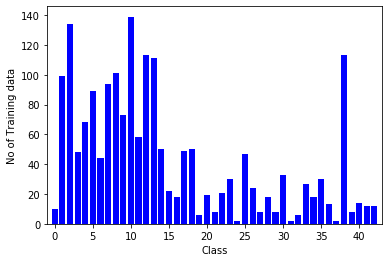

 
We can definitely see class bias issue as certain classes are under represented


In [11]:
# Checking for class bias before data augmentation 

unique_elements, counts_elements = np.unique(np.array(train_labels).astype('int32'), return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

plt.bar( np.arange( 43 ), counts_elements, align='center',color='blue' )
plt.xlabel('Class')
plt.ylabel('No of Training data')
plt.xlim([-1, 43])

plt.show()

print(" ")
print("We can definitely see class bias issue as certain classes are under represented")

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 22 23 24 25 26 28
  29 30 31 32 33 34 35 36 37 38 39 40 41 42]
 [78 50 23 84 34  5 13 25 21 34 27 69 74 25 11  2 10 22  8 19  7 18 14 13
   4  4  3 12  6  7 10  2  3 64  3  6  2  9]]


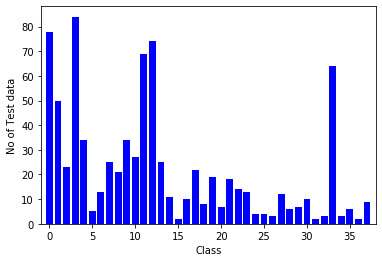

 
We can definitely see class bias issue as certain classes are under represented


In [12]:
# Checking for class bias in test set

unique_elements, counts_elements = np.unique(np.array(test_labels).astype('int32'), return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

plt.bar( np.arange( 38 ), counts_elements, align='center',color='blue' )
plt.xlabel('Class')
plt.ylabel('No of Test data')
plt.xlim([-1, 38])

plt.show()

print(" ")
print("We can definitely see class bias issue as certain classes are under represented")

In [13]:
no_images_per_class = 100
X_train_aug, y_train_aug = augment_and_balance_data(np.array(train_signs), np.array(train_labels).astype('int32'), no_images_per_class)
X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)

0 10
1 99
2 134
3 48
4 68
5 89
6 44
7 94
8 101
9 73
10 139
11 58
12 113
13 111
14 50
15 22
16 18
17 49
18 50
19 6
20 19
21 8
22 21
23 30
24 2
25 47
26 24
27 8
28 18
29 8
30 33
31 2
32 6
33 27
34 18
35 30
36 13
37 2
38 113
39 8
40 14
41 12
42 12


[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42]
 [110 199 234 148 168 189 144 194 201 173 239 158 213 211 150 122 118 149
  150 106 119 108 121 130 102 147 124 108 118 108 133 102 106 127 118 130
  113 102 213 108 114 112 112]]


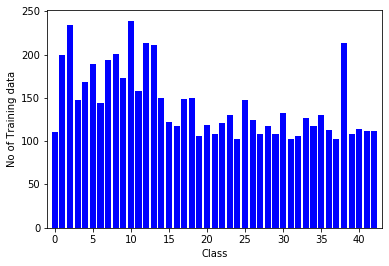

In [14]:
# Checking for class bias after data augmentation

unique_elements, counts_elements = np.unique(y_train_aug, return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

plt.bar( np.arange( 43 ), counts_elements, align='center',color='blue' )
plt.xlabel('Class')
plt.ylabel('No of Training data')
plt.xlim([-1, 43])

plt.show()

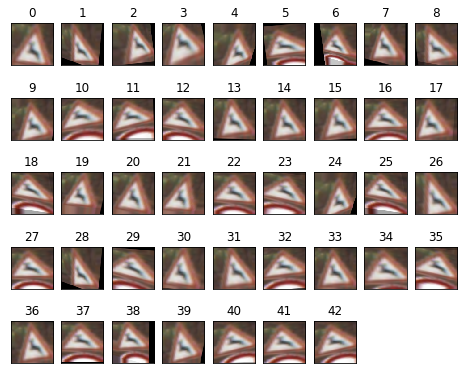

In [15]:
# Show examples from each class after data augmentation
class_names = np.unique(y_train_aug)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(y_train_aug, 31))[0]#class_names[i]
    plt.imshow(cv2.cvtColor(X_train_aug[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

tr_signs, va_signs, tr_labels, va_labels = train_test_split(X_train_aug, y_train_aug, test_size=0.2, random_state=42, stratify=y_train_aug)

In [0]:
tr_signs = np.array(tr_signs)
tr_labels = np.array(tr_labels)
va_signs = np.array(va_signs)
va_labels = np.array(va_labels)
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

temp_tr_labels = tr_labels

In [18]:
from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

Using TensorFlow backend.


In [0]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

## Training Model

In [0]:
# from keras.applications.vgg16 import VGG16
# from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Activation
# from keras.models import Model
# from keras.optimizers import Adam

# baseline = VGG16(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3), include_top=False)

# x = baseline.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(512, use_bias=False)(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Dropout(0.25)(x)
# x = Dense(512, use_bias=False)(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Dropout(0.5)(x)

# predictions = Dense(num_classes, activation='softmax')(x)
# tlm = Model(inputs=baseline.input, outputs=predictions)

# # for i,layer in enumerate(tlm.layers):
# #   print(i,layer.name)  

# # print('\nnon-trainable')
# # for layer in tlm.layers[:11]:
# #     layer.trainable=False
# #     print(layer.name)

# # print('\ntrainable')
# # for layer in tlm.layers[11:]:
# #     layer.trainable=True
# #     print(layer.name)

# opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# tlm.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# tlm.summary()

In [29]:
from keras.applications.xception import Xception
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Activation
from keras.models import Model
from keras.optimizers import Adam

baseline = Xception(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3), include_top=False)

x = baseline.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# x = Dense(2048, activation='relu')(x)
# x = Dropout(0.25)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.25)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.3)(x)

predictions = Dense(num_classes, activation='softmax')(x)
tlm = Model(inputs=baseline.input, outputs=predictions)

# for i,layer in enumerate(tlm.layers):
#   print(i,layer.name)  

# print('\nnon-trainable')
# for layer in baseline.layers[:116]:
#     layer.trainable=False
#     print(layer.name)

# print('\ntrainable')
# for layer in baseline.layers[116:]:
#     layer.trainable=True
#     print(layer.name)

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
tlm.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
tlm.summary()

83689472/83683744 [==============================] - 3s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 47, 47, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 47, 47, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 47, 47, 32)   0           block1_conv1_bn[0][0]            
___________________________

In [30]:
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight("balanced", np.unique(temp_tr_labels), temp_tr_labels)
print(class_weight)

[1.3  0.72 0.61 0.97 0.85 0.76 0.99 0.74 0.71 0.83 0.6  0.91 0.67 0.68
 0.95 1.17 1.22 0.96 0.95 1.35 1.2  1.33 1.18 1.1  1.4  0.97 1.16 1.32
 1.22 1.32 1.08 1.4  1.35 1.12 1.22 1.1  1.27 1.4  0.67 1.32 1.26 1.27
 1.27]


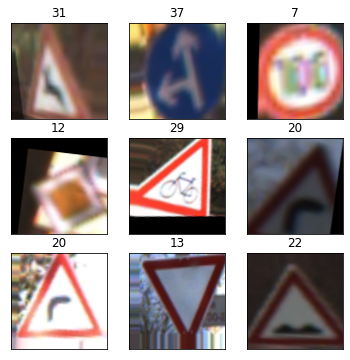

Epoch 1/50
 - 58s - loss: 2.1545 - acc: 0.3888 - val_loss: 0.7423 - val_acc: 0.7839
Epoch 2/50
 - 48s - loss: 0.4768 - acc: 0.8658 - val_loss: 0.8184 - val_acc: 0.8140
Epoch 3/50
 - 49s - loss: 0.2134 - acc: 0.9505 - val_loss: 0.1687 - val_acc: 0.9578
Epoch 4/50
 - 48s - loss: 0.2068 - acc: 0.9533 - val_loss: 0.2059 - val_acc: 0.9488
Epoch 5/50
 - 48s - loss: 0.1141 - acc: 0.9731 - val_loss: 0.0754 - val_acc: 0.9862
Epoch 6/50
 - 48s - loss: 0.0741 - acc: 0.9831 - val_loss: 0.0491 - val_acc: 0.9919
Epoch 7/50
 - 48s - loss: 0.1044 - acc: 0.9778 - val_loss: 0.0747 - val_acc: 0.9846
Epoch 8/50
 - 48s - loss: 0.0823 - acc: 0.9816 - val_loss: 0.0442 - val_acc: 0.9886
Epoch 9/50
 - 48s - loss: 0.1187 - acc: 0.9757 - val_loss: 0.4173 - val_acc: 0.9391
Epoch 10/50
 - 48s - loss: 0.0896 - acc: 0.9824 - val_loss: 0.0105 - val_acc: 0.9959
Epoch 11/50
 - 48s - loss: 0.0520 - acc: 0.9888 - val_loss: 0.0543 - val_acc: 0.9878
Epoch 12/50
 - 49s - loss: 0.0984 - acc: 0.9775 - val_loss: 0.1061 - val_a

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

datagen = ImageDataGenerator(featurewise_center=False,
                             featurewise_std_normalization=False,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10.)

datagen.fit(tr_signs, augment=True)

for x_batch, y_batch in datagen.flow(tr_signs, tr_labels, batch_size=9):
    # create a grid of 3x3 images
    fig = plt.figure(figsize=(6,6))
    for i in range(0, 9):
        ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
        ax.set_title(np.argmax(y_batch[i]))
        plt.imshow(cv2.cvtColor(x_batch[i], cv2.COLOR_BGR2RGB))
    # show the plot
    plt.show()
    break

train_steps = int(len(tr_signs) / 16)
valid_steps = int(len(va_signs) / 16)

data = tlm.fit_generator(datagen.flow(tr_signs, tr_labels, batch_size=32),                              
                              epochs=50, 
                              steps_per_epoch=train_steps, 
                              verbose=2, 
                              validation_data=(va_signs, va_labels), 
                              validation_steps=valid_steps, 
                              callbacks=[tensorboard, early_stopping],
                              class_weight = class_weight)

start = time()
loss, acc = tlm.evaluate(te_signs, te_labels, verbose=0)
end = time()
print('TLM took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

## Performance Evaluation

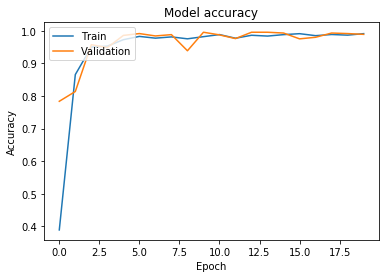

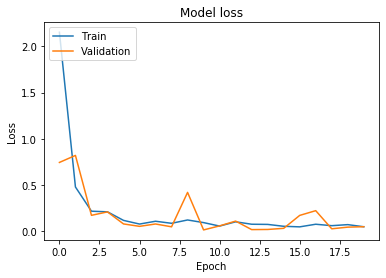

In [32]:
# Plot training & validation accuracy values
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Automatically created module for IPython interactive environment
Normalized confusion matrix
[[0.99 0.   0.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.78]]


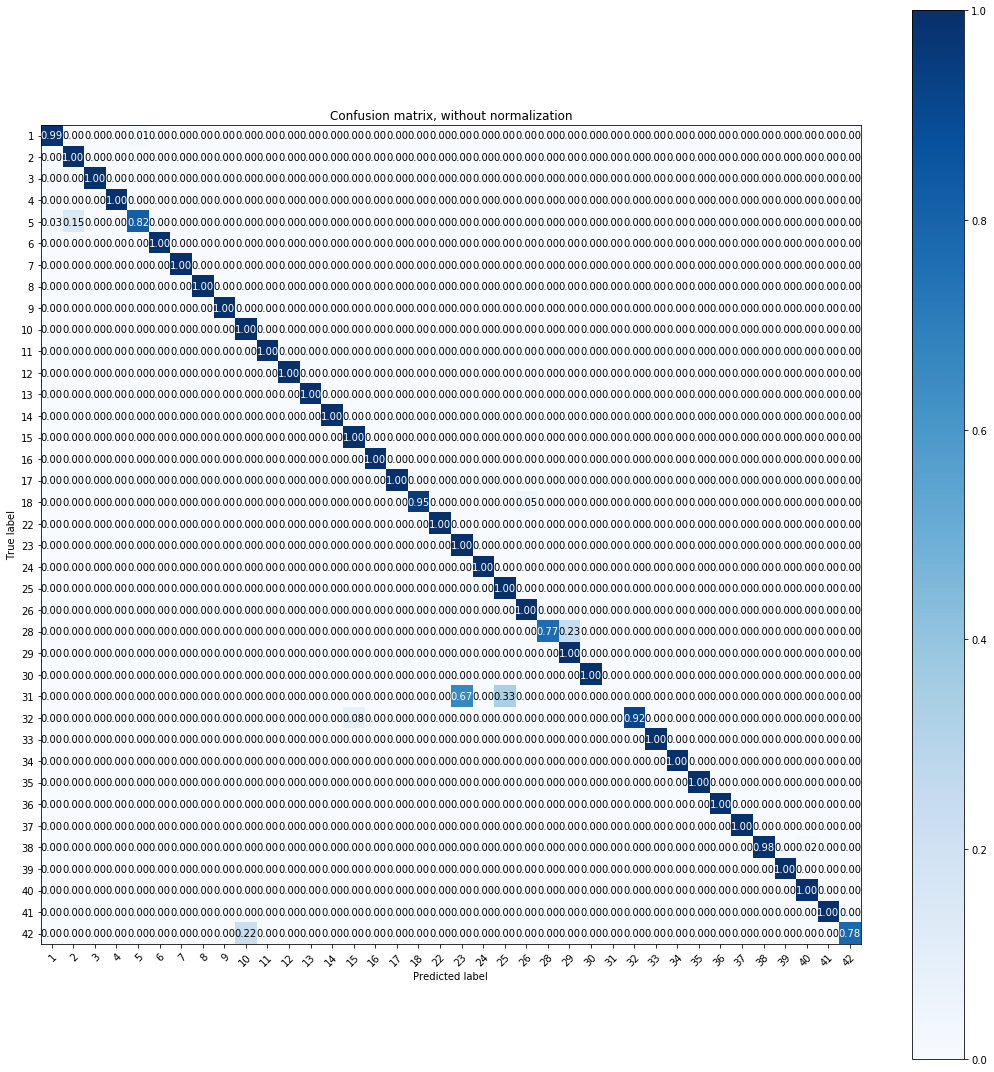

In [33]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(
    np.argmax(te_labels, axis=1), 
    np.argmax(tlm.predict(te_signs), axis=1), 
    classes=np.array(range(43)),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

##Performance Tests


In [26]:
## training binary model in binary_detector notebook

## importing it below

from keras.models import model_from_json
# load json and create model
json_file = open('drive/My Drive/models/bin_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn = model_from_json(loaded_model_json)
# load weights into new model
cnn.load_weights("drive/My Drive/models/bin_model.h5")
print("Loaded binary model from disk")


Loaded binary model from disk


In [0]:
# import matplotlib.pyplot as plt
# import math

# run some tests

# i=0
# number_of_images = 20
correct_pr = 0
false_pr = 0
counter = 0
counter2 = 0
# number_of_boxes_to_draw = 1000


for filename in test_images:
    # Draw predictions
    aux = test_images.get(filename)[0].copy()
    
    # Draw ground truth
    # this is what we should detect
    if filename in test_files:
        for idx in [i for i, x in enumerate(test_files) if x == filename]:
            bbox = test_bboxes[idx]
            # print(bbox)
            cv2.rectangle(aux, (int(bbox[0]),int(bbox[1])), (int(bbox[2]),int(bbox[3])), (0,0,255), 3)

            # make a prediction
            roi = aux[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
            SIGN_SIZE_CNN = (96, 96)
            roi_resized = cv2.resize(roi, SIGN_SIZE_CNN)
            roi_resized = roi_resized.astype('float32')
            roi_resized /= 255.0
            roi_resized = np.reshape(roi_resized, [1,SIGN_SIZE_CNN[0],SIGN_SIZE_CNN[1],3])

            print("\n", filename)
            confidence = cnn.predict(roi_resized)
            if confidence[0][1]>=0.5: 
              print("Confidence: ", confidence[0][1])
              sign_class = tlm.predict(roi_resized)
              print("Predicted sign class: ", np.argmax(sign_class[0]))
              print("Actual sign class: ", test_labels[idx])
              if np.argmax(sign_class[0])==test_labels[idx].astype("int"):
                # print("correct prediction")
                correct_pr+=1
              else:
                # print("false prediction")
                false_pr+=1
              counter+=1
            else:
              print("Confidence: ", confidence[0][1])
              counter2+=1
            
            # print contents of box if you like
#             sign = aux[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
#             plt.imshow(cv2.cvtColor(sign, cv2.COLOR_BGR2RGB))
#             plt.show()
    
    # plt.imshow(cv2.cvtColor(aux, cv2.COLOR_BGR2RGB))
    # plt.show()
    # i+=1
    # if i==number_of_images: break

print("\n")
print("Total of correct predictions: ", correct_pr)
print("Total of false predictions: ", false_pr)
print("Total number of detected traffic signs: ", counter)
print("Total number of non detected traffic signs: ", counter2)

## Save model

In [35]:
# serialize model to JSON
model_json = tlm.to_json()
with open("drive/My Drive/models/classification_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
tlm.save_weights("drive/My Drive/models/classification_model.h5")
print("Saved model to disk")

Saved model to disk
